<a href="https://colab.research.google.com/github/sajiniho07/PossumAgePredictorModel/blob/main/possum_age_predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# step 1: read data

In [ ]:
df = pd.read_csv("/content/sample_data/possum.csv")

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
# step 2: seprate features

In [ ]:
df_y = df[["age"]]

In [ ]:
df_x = df.drop(labels=["case", "site", "Pop", "age"], axis=1)

In [ ]:
# step 3: encode charachters to number

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_x_array = df_x.values
df_x_encoded = df_x_array.copy()
encoder = LabelEncoder()
df_x_encoded[:, 0] = encoder.fit_transform(df_x_array[:, 0 ])

In [ ]:
print(df_x_encoded)

     0     1     2     3     4     5     6     7     8     9
0    1  94.1  60.4  89.0  36.0  74.5  54.5  15.2  28.0  36.0
1    0  92.5  57.6  91.5  36.5  72.5  51.2  16.0  28.5  33.0
2    0  94.0  60.0  95.5  39.0  75.4  51.9  15.5  30.0  34.0
3    0  93.2  57.1  92.0  38.0  76.1  52.2  15.2  28.0  34.0
4    0  91.5  56.3  85.5  36.0  71.0  53.2  15.1  28.5  33.0
..  ..   ...   ...   ...   ...   ...   ...   ...   ...   ...
99   1  89.5  56.0  81.5  36.5  66.0  46.8  14.8  23.0  27.0
100  1  88.6  54.7  82.5  39.0  64.4  48.0  14.0  25.0  33.0
101  0  92.4  55.0  89.0  38.0  63.5  45.4  13.0  25.0  30.0
102  1  91.5  55.2  82.5  36.5  62.9  45.9  15.4  25.0  29.0
103  0  93.6  59.9  89.0  40.0  67.6  46.0  14.8  28.5  33.5

[104 rows x 10 columns]


In [ ]:
# step 4: fill nans with mean

In [ ]:
df_x_encoded = pd.DataFrame(df_x_encoded)
df_x_nans_filled = df_x_encoded.fillna(df_x_encoded.mean())

In [ ]:
df_y_nans_filled = df_y.fillna(df_y.mean())

In [ ]:
# step 5: normalize X datas

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm =  scaler.fit_transform(df_x_nans_filled)

In [ ]:
# step 6: split data to train & test

In [32]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y_nans_filled.values.reshape((-1, )), train_size=0.8)

In [ ]:
# step 7: initialize model callback

In [37]:
from keras.callbacks import EarlyStopping

callBack  = EarlyStopping(patience=5, restore_best_weights=True)

In [34]:
# step 8: define Dense model

In [38]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# step 9: fit model

In [41]:
results = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/40
3/3 [==============================] - 0s 76ms/step - loss: 2.5007 - val_loss: 3.9189
Epoch 2/40
3/3 [==============================] - 0s 22ms/step - loss: 2.4616 - val_loss: 3.8985
Epoch 3/40
3/3 [==============================] - 0s 22ms/step - loss: 2.4296 - val_loss: 3.8687
Epoch 4/40
3/3 [==============================] - 0s 21ms/step - loss: 2.3965 - val_loss: 3.8652
Epoch 5/40
3/3 [==============================] - 0s 21ms/step - loss: 2.3561 - val_loss: 3.8620
Epoch 6/40
3/3 [==============================] - 0s 21ms/step - loss: 2.3279 - val_loss: 3.8478
Epoch 7/40
3/3 [==============================] - 0s 18ms/step - loss: 2.2999 - val_loss: 3.8219
Epoch 8/40
3/3 [==============================] - 0s 18ms/step - loss: 2.2677 - val_loss: 3.8436
Epoch 9/40
3/3 [==============================] - 0s 18ms/step - loss: 2.2393 - val_loss: 3.8368
Epoch 10/40
3/3 [==============================] - 0s 18ms/step - loss: 2.2170 - val_loss: 3.8576
Epoch 11/40
3/3 [============

In [ ]:
# step 10: prediction

In [50]:
yhat_test = model.predict(x_test).round()

1/1 [==============================] - 0s 151ms/step


In [ ]:
# step 11: metrics

In [60]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

yhat_test_reshaped = np.reshape(yhat_test, y_test.shape)
print(cr(y_test, yhat_test_reshaped))
print(cm(y_test, yhat_test_reshaped))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.20      0.12      0.15         8
         4.0       0.00      0.00      0.00         5
         5.0       0.25      0.33      0.29         3
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         3

    accuracy                           0.10        21
   macro avg       0.06      0.07      0.06        21
weighted avg       0.11      0.10      0.10        21

[[0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 2 1 4 0 0 1]
 [0 0 4 0 1 0 0]
 [0 0 0 1 1 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

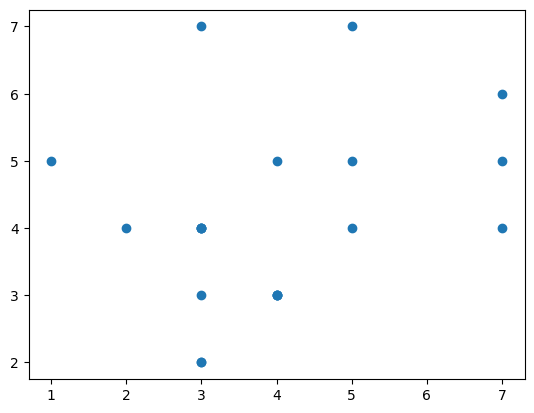

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, yhat_test_reshaped)

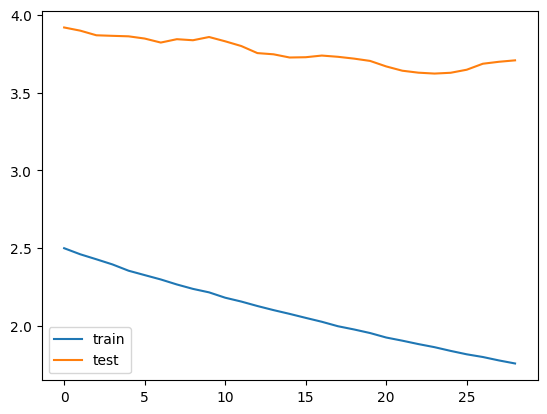

In [56]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='test')
plt.legend()

In [58]:
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='linear'))

model_2.compile(optimizer='adam', loss='mse')

results_2 = model_2.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100
3/3 [==============================] - 2s 136ms/step - loss: 16.2447 - val_loss: 14.0764
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 14.2613 - val_loss: 11.7974
Epoch 3/100
3/3 [==============================] - 0s 33ms/step - loss: 12.1611 - val_loss: 9.4872
Epoch 4/100
3/3 [==============================] - 0s 45ms/step - loss: 10.1544 - val_loss: 7.2181
Epoch 5/100
3/3 [==============================] - 0s 47ms/step - loss: 8.4163 - val_loss: 5.2354
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 6.7989 - val_loss: 3.8456
Epoch 7/100
3/3 [==============================] - 0s 29ms/step - loss: 5.5338 - val_loss: 3.2478
Epoch 8/100
3/3 [==============================] - 0s 39ms/step - loss: 5.0677 - val_loss: 3.3902
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 4.8410 - val_loss: 3.9268
Epoch 10/100
3/3 [==============================] - 0s 34ms/step - loss: 4.6470 - val_loss: 4.2614
Epoch 11/100

In [59]:
yhat_test_2 = model_2.predict(x_test).round()

1/1 [==============================] - 0s 70ms/step


In [62]:
yhat_test_reshaped_2 = np.reshape(yhat_test_2, y_test.shape)
print(cr(y_test, yhat_test_reshaped_2))
print(cm(y_test, yhat_test_reshaped_2))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.44      0.50      0.47         8
         4.0       0.33      0.20      0.25         5
         5.0       0.50      0.33      0.40         3
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         3

    accuracy                           0.29        21
   macro avg       0.18      0.15      0.16        21
weighted avg       0.32      0.29      0.30        21

[[0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 2 4 1 0 1 0]
 [0 3 1 1 0 0 0]
 [0 0 2 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 1 1 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

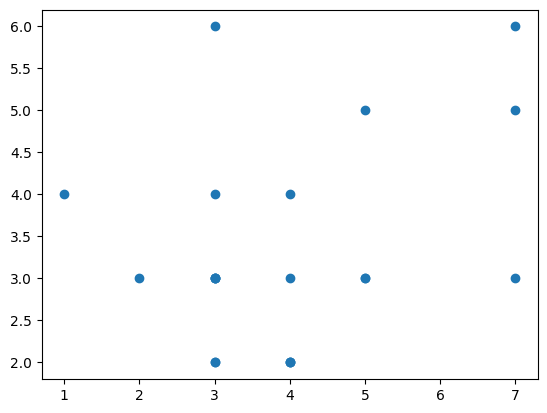

In [63]:
plt.scatter(y_test, yhat_test_reshaped_2)

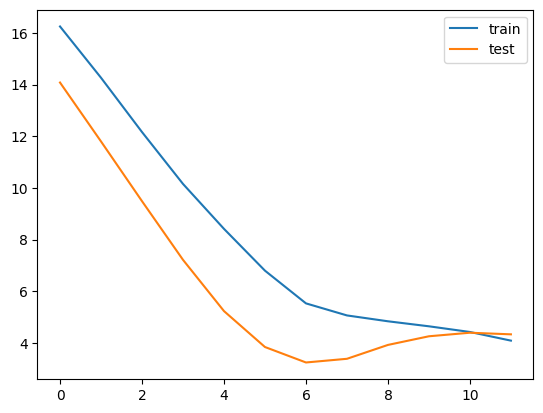

In [64]:
plt.plot(results_2.history['loss'], label='train')
plt.plot(results_2.history['val_loss'], label='test')
plt.legend()

In [65]:
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU

model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_3.add(Dense(64))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(32))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(1, activation='linear'))

model_3.compile(optimizer=RMSprop(lr=0.001), loss='mse')

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 1s 39ms/step - loss: 14.2576 - val_loss: 8.4349
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 7.6750 - val_loss: 4.1222
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 4.8480 - val_loss: 3.7729
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 3.9698 - val_loss: 3.6956
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 3.6099 - val_loss: 3.9688
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 3.3687 - val_loss: 4.6277
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 3.1024 - val_loss: 4.6952
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 2.9205 - val_loss: 4.0378
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 2.7135 - val_loss: 4.1705


In [66]:
yhat_test_3 = model_3.predict(x_test).round()

yhat_test_reshaped_3 = np.reshape(yhat_test_3, y_test.shape)
print(cr(y_test, yhat_test_reshaped_3))
print(cm(y_test, yhat_test_reshaped_3))

1/1 [==============================] - 0s 69ms/step
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.25      0.12      0.17         8
         4.0       0.20      0.20      0.20         5
         5.0       0.50      0.67      0.57         3
         7.0       0.50      0.33      0.40         3

    accuracy                           0.24        21
   macro avg       0.24      0.22      0.22        21
weighted avg       0.29      0.24      0.25        21

[[0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 3 1 3 0 1]
 [0 3 1 1 0 0]
 [0 0 1 0 2 0]
 [0 0 0 1 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


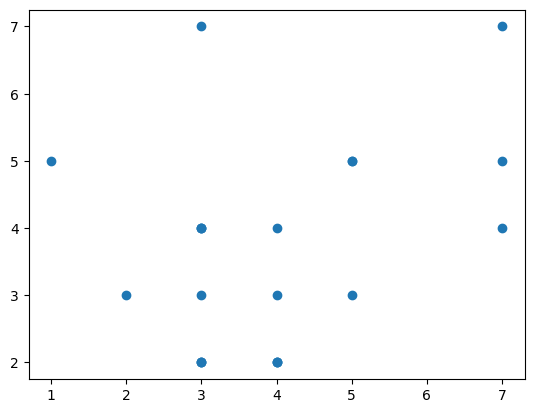

In [67]:
plt.scatter(y_test, yhat_test_reshaped_3)

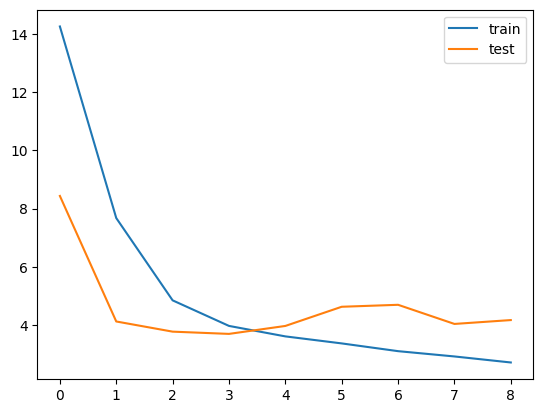

In [68]:
plt.plot(results_3.history['loss'], label='train')
plt.plot(results_3.history['val_loss'], label='test')
plt.legend()

Epoch 1/100
3/3 [==============================] - 3s 99ms/step - loss: 18.1418 - val_loss: 18.2952
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 17.2219 - val_loss: 17.5013
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 16.4461 - val_loss: 16.8992
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 15.8192 - val_loss: 16.2510
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 15.2912 - val_loss: 15.5963
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 14.5105 - val_loss: 14.8739
Epoch 7/100
3/3 [==============================] - 0s 19ms/step - loss: 13.6987 - val_loss: 14.0803
Epoch 8/100
3/3 [==============================] - 0s 29ms/step - loss: 12.8279 - val_loss: 13.1010
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 11.8218 - val_loss: 11.9013
Epoch 10/100
3/3 [==============================] - 0s 20ms/step - loss: 10.7594 - val_loss: 10.6018

1/1 [==============================] - 0s 85ms/step
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         1
         3.0       0.60      0.38      0.46         8
         4.0       0.20      0.60      0.30         5
         5.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         3

    accuracy                           0.29        21
   macro avg       0.13      0.16      0.13        21
weighted avg       0.28      0.29      0.25        21

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 1 3 4 0 0]
 [0 0 2 3 0 0]
 [0 0 0 3 0 0]
 [0 0 0 3 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


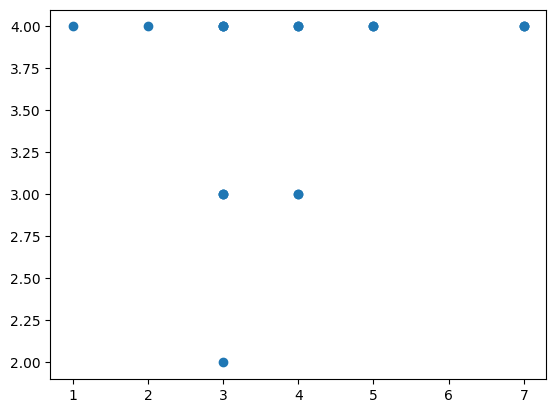

In [70]:
model_4 = Sequential()
model_4.add(Dense(128, activation='tanh', input_shape=x_train.shape[1:]))
model_4.add(Dense(64, activation='tanh'))
model_4.add(Dense(32, activation='tanh'))
model_4.add(Dense(16, activation='tanh'))
model_4.add(Dense(1, activation='linear'))

model_4.compile(optimizer='adam', loss='mse')

results_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

yhat_test_4 = model_4.predict(x_test).round()
yhat_test_reshaped_4 = np.reshape(yhat_test_4, y_test.shape)
print(cr(y_test, yhat_test_reshaped_4))
print(cm(y_test, yhat_test_reshaped_4))

plt.scatter(y_test, yhat_test_reshaped_4)

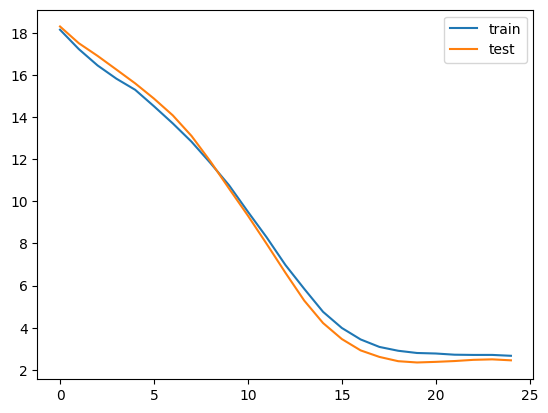

In [71]:
plt.plot(results_4.history['loss'], label='train')
plt.plot(results_4.history['val_loss'], label='test')
plt.legend()

In [72]:
print(yhat_test_reshaped_4)
print(y_test)

[4. 4. 4. 3. 4. 3. 3. 4. 3. 4. 4. 4. 3. 4. 4. 4. 4. 2. 4. 4. 4.]
[4. 5. 1. 4. 5. 3. 3. 7. 4. 2. 3. 3. 3. 7. 3. 7. 4. 3. 5. 3. 4.]
